# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

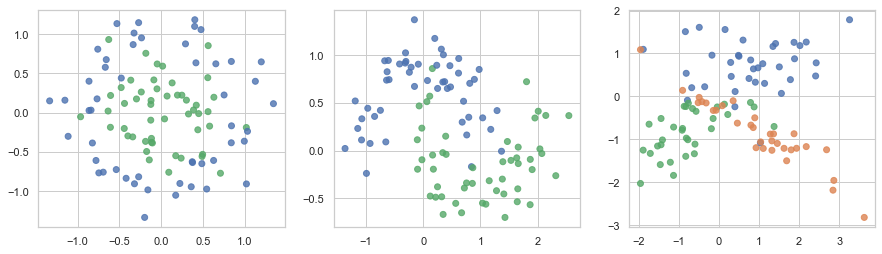

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

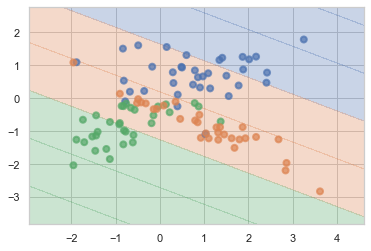

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

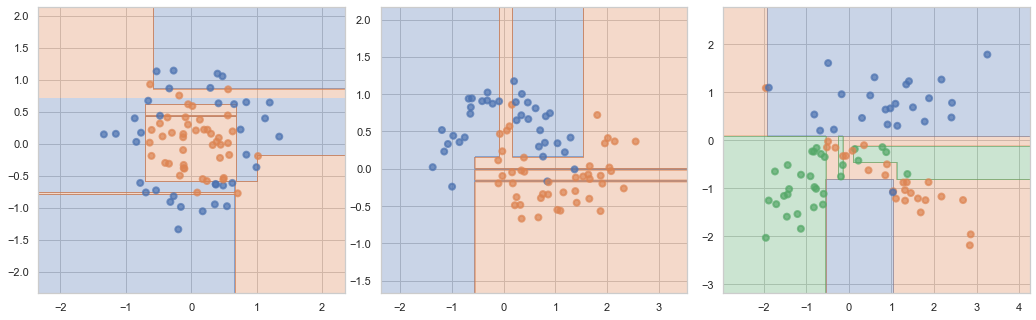

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(15,5))
devided_datasets = []
predictions = []
for i in range(3):
    plt.subplot(1, 3, i + 1)
    Xi, yi = datasets[i]
    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, train_size=0.8, random_state=42)
    devided_datasets.append((Xi_train, Xi_test, yi_train, yi_test))
    dTree = DecisionTreeClassifier(random_state=42).fit(Xi_train, yi_train)
    predictions.append((dTree.predict(Xi_train), dTree.predict(Xi_test)))
    plot_surface(dTree, Xi_train, yi_train)

In [8]:
accuracies = []
size = predictions[0][0].shape
for i in range(3):
    accuracy_train = (np.sum(predictions[i][0] == devided_datasets[0][2]) / size)[0]
    accuracy_test = (np.sum(predictions[i][1] == devided_datasets[0][3]) / size)[0]
    accuracies.append((accuracy_train, accuracy_test))
accuracies

[(1.0, 0.1625), (1.0, 0.2375), (0.4125, 0.1375)]

__Ответ:__ на первой и второй дерево переобучилось очень сильно(результаты предсказания упали в 6.25 и в 4.2 раза соотвественно), на третьей выборке результат упал в 3 раза, что тоже свидетельствует об сильном ухудшении качества предсказания на тестовой выборке(короче дерево тоже переобучилось) 

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def surfaceWithParams(X, y):
    mistakes = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=666)
    plt.figure(figsize=(14, 14))
    for i, max_depth in enumerate([2, 4, None]):
        for j, min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            mistakes.append(
                ((np.sum(clf.predict(X_train) == y_train)) / y_train.shape[0], 
                (np.sum(clf.predict(X_test) == y_test) / y_test.shape[0])))
            plt.subplot2grid((3, 3), (i, j))
            #plt.pcolormesh(xx, yy, predicted, cmap='spring')
            #plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring', edgecolor='k')
            plot_surface(clf, X_train, y_train)
            plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + 
                      str(min_samples_leaf) + " with miss=" + str(mistakes[3 * i + j][1]))
            
    return mistakes

[(0.7875, 0.7),
 (0.8, 0.65),
 (0.8, 0.65),
 (0.7875, 0.7),
 (0.925, 0.8),
 (0.95, 0.8),
 (0.7875, 0.7),
 (0.925, 0.8),
 (1.0, 0.7)]

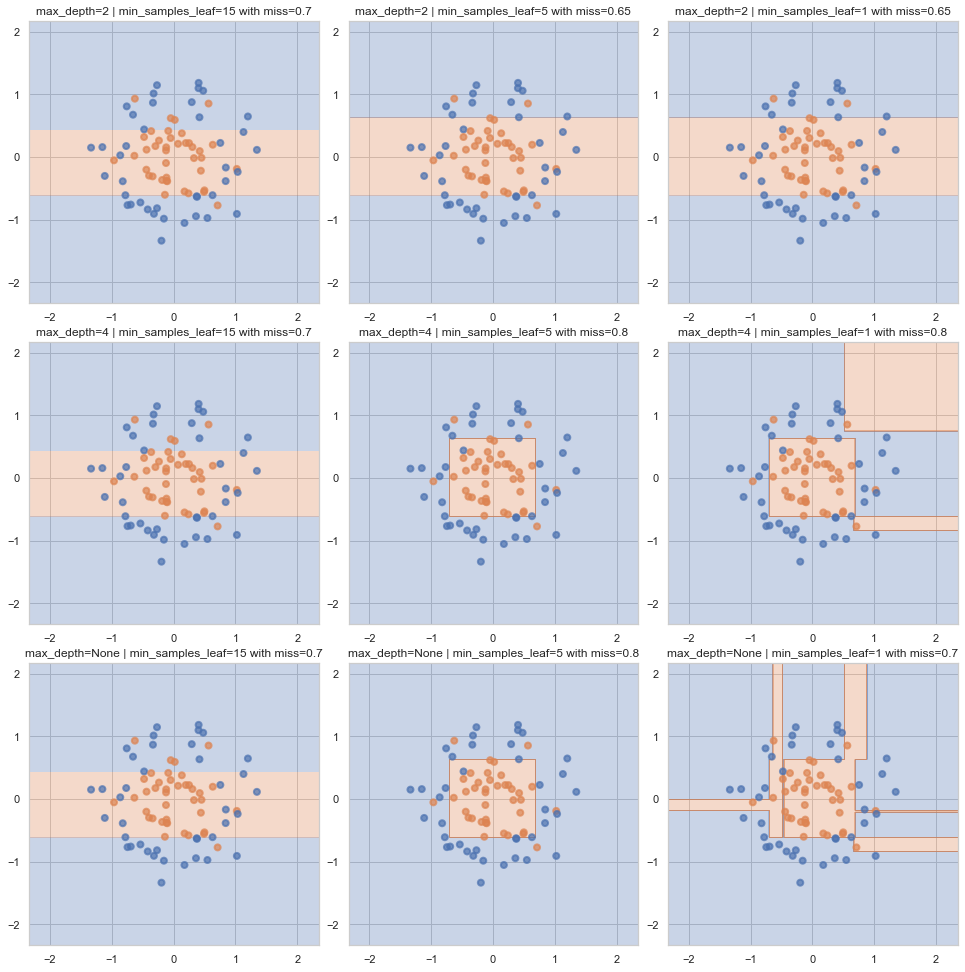

In [10]:
X0, y0 = datasets[0]
mistakes0 = surfaceWithParams(X0, y0)
mistakes0

[(0.85, 0.75),
 (0.9125, 0.8),
 (0.9125, 0.8),
 (0.85, 0.75),
 (0.9375, 0.9),
 (0.9625, 0.9),
 (0.85, 0.75),
 (0.9375, 0.9),
 (1.0, 0.9)]

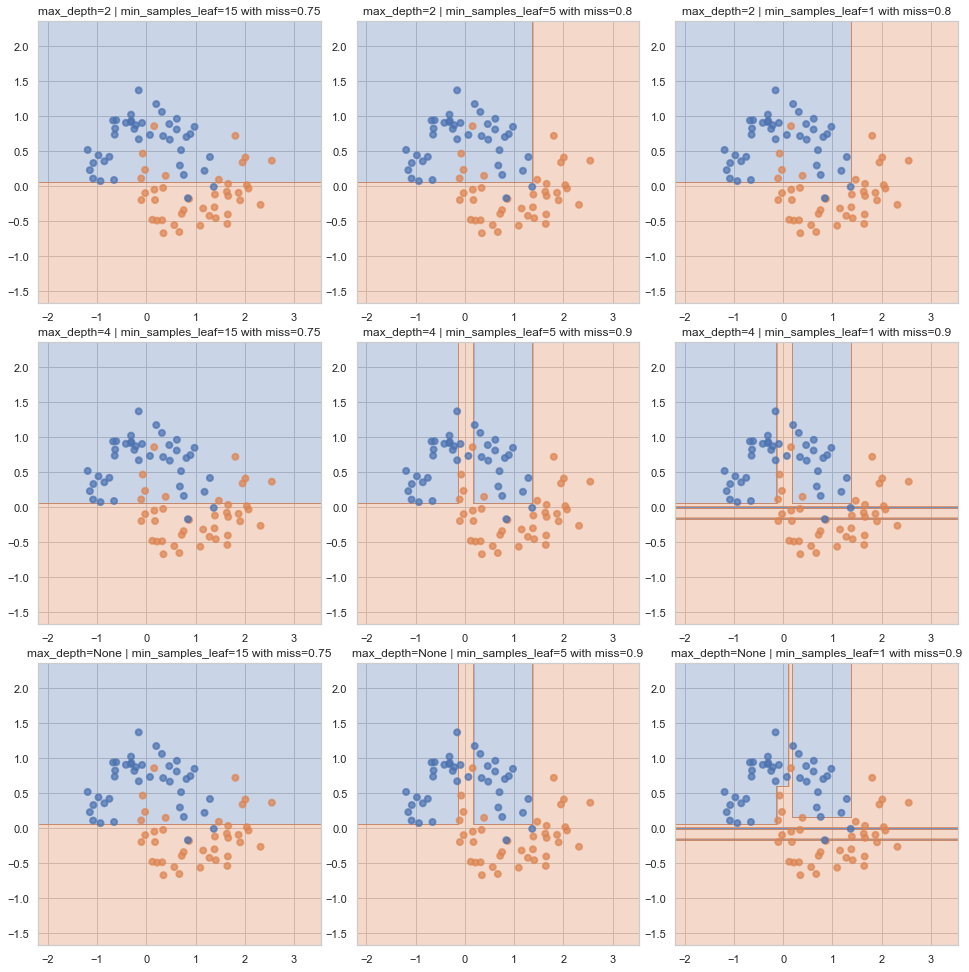

In [11]:
X1, y1 = datasets[1]
mistakes1 = surfaceWithParams(X1, y1)
mistakes1

[(0.875, 0.85),
 (0.875, 0.85),
 (0.8875, 0.8),
 (0.875, 0.85),
 (0.875, 0.85),
 (0.8875, 0.8),
 (0.875, 0.85),
 (0.875, 0.85),
 (1.0, 0.75)]

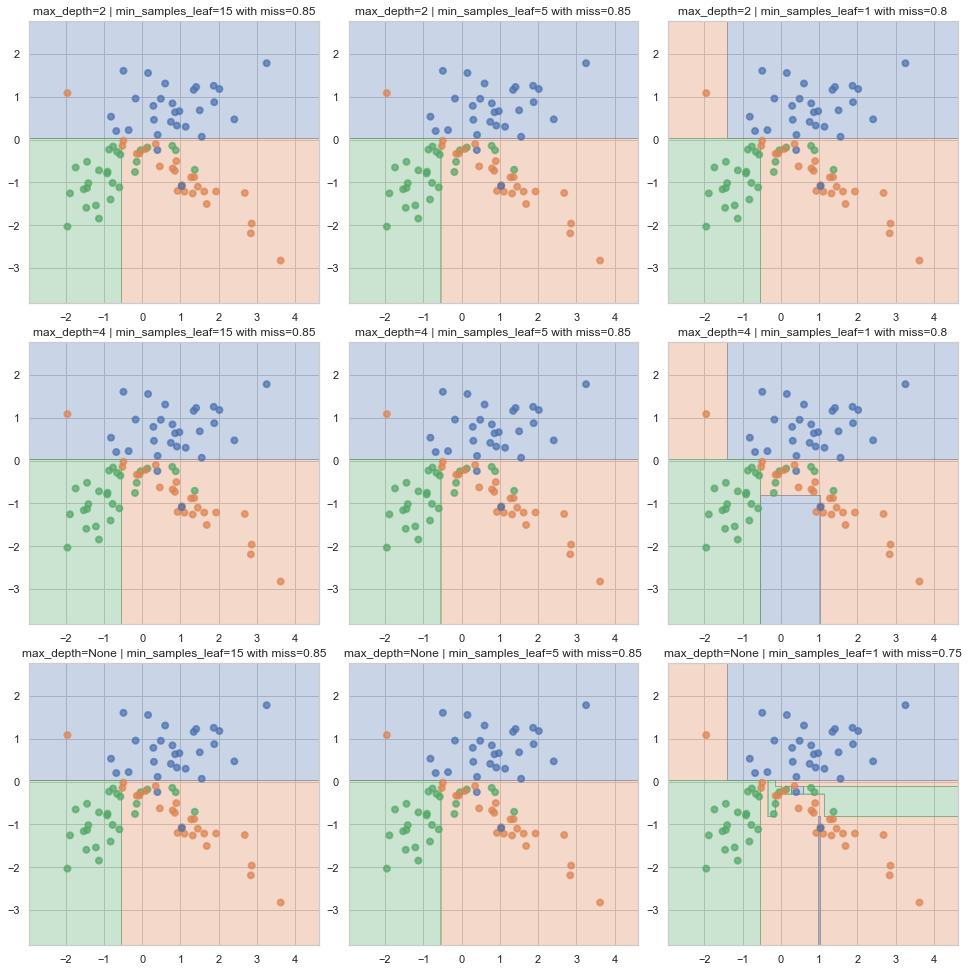

In [12]:
X2, y2 = datasets[2]
mistakes2 = surfaceWithParams(X2, y2)
mistakes2

__Ответ:__ Для каждого датасета видно, что при __max_depth__=2 деревья не особо переобучаются. Так же видно, что сильнейшее переобучение прослеживается на последнем столбике, чем глубже дерево при __min_samples_leaf__=1, тем сильнее дробится поверхность(что ожидаемо).

Лучшие результаты для 1 датасета: accuracy упала с 0.925 до 0.8 при __max_depth__=4+(при None доля правильных ответов никак не изменилась, а значит 4 - максимальная глубина дерева) при __max_samples_leaf__=5

Лучшие результаты для 2 датасета: accuracy упала с 1.0 до 0.95 при __max_depth__=None и при __max_samples_leaf__=1
(Замечу, что при __max_depth__=4 результат на тесте такой же, а вот на трейне результат 0.9625, что выглядит интересно, потому что (accuracy_train-accuracy_test)/accuracy_train * 100% ~= 1.3% - относительное падение доли правильных ответов, что очень мало)

Лучшие результаты для 3 датасета: accuracy упала с 0.875 до 0.85 при всех __max_depth__ и при всех __max_samples_leaf__, кроме 1, при __max_samples_leaf__=1 видно, что дерево переобучается сильнее при увеличении максимально допустимой глубины

In [13]:
# хочу красивый график... \-><-/

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [14]:
import hw5code

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data_user = pd.read_csv("Training_Data.csv")

In [16]:
data_user.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [17]:
data_user[" UNS"][(data_user[' UNS'] == 'very_low')|(data_user[' UNS'] == 'Low')] = 0
data_user[" UNS"][(data_user[' UNS'] == 'Middle')|(data_user[' UNS'] == 'High')] = 1
data_user = data_user.astype({' UNS': np.int8})
data_user.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [18]:
target = data_user[' UNS'].values
stg = data_user["STG"].values
scg = data_user["SCG"].values
stR = data_user["STR"].values
lpr = data_user["LPR"].values
peg = data_user["PEG"].values

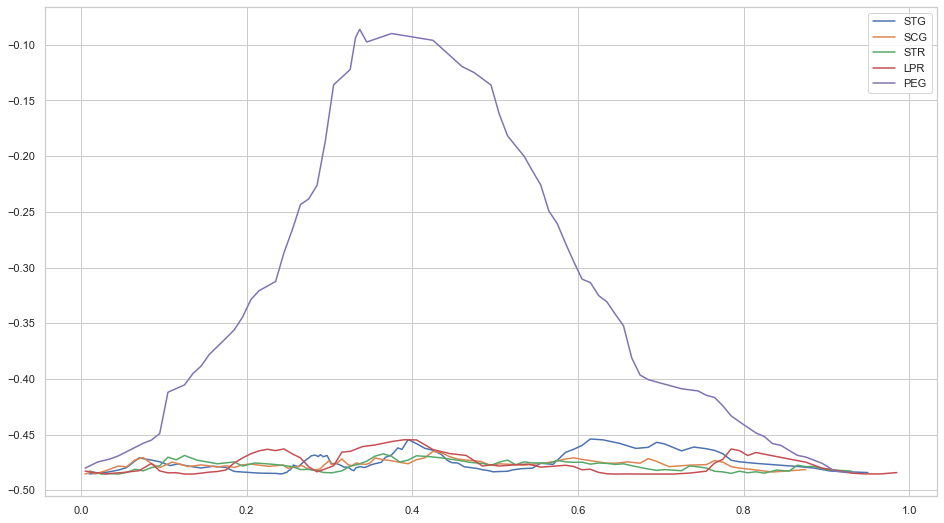

In [19]:
stg_res = hw5code.find_best_split(stg, target) 
stg_threshold, stg_gini = list(stg_res[0]), list(stg_res[1])

scg_res = hw5code.find_best_split(scg, target) 
scg_threshold, scg_gini = list(scg_res[0]), list(scg_res[1])

stR_res = hw5code.find_best_split(stR, target) 
stR_threshold, stR_gini = list(stR_res[0]), list(stR_res[1])

lpr_res = hw5code.find_best_split(lpr, target) 
lpr_threshold, lpr_gini = list(lpr_res[0]), list(lpr_res[1])

peg_res = hw5code.find_best_split(peg, target) 
peg_threshold, peg_gini = list(peg_res[0]), list(peg_res[1])

plt.figure(figsize=(16,9))
plt.plot(stg_threshold, stg_gini, label='STG')
plt.plot(scg_threshold, scg_gini, label='SCG')
plt.plot(stR_threshold, stR_gini, label='STR')
plt.plot(lpr_threshold, lpr_gini, label='LPR')
plt.plot(peg_threshold, peg_gini, label='PEG')
plt.legend()
#data_user.head()

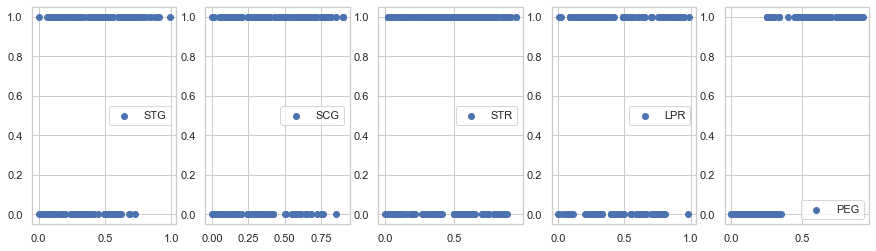

In [20]:
plt.figure(figsize=(15,4))
list_of_all = [stg, scg, stR, lpr, peg]
list_of_labels = ["STG", "SCG", "STR", "LPR", "PEG"]
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.scatter(list_of_all[i], target, label=list_of_labels[i])
    plt.legend()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Из графиков очевидно, что лучше производить отбор только по признаку "PEG", что отлично согласуется с визуальной оценкой scatter-графика - на нем можно провести четкую вертикальную линию так, что слева от нее будет очень много объектов с классом 0, а справа от нее будет очень много объектов класса 1(много по сравнению с количеством другого класса)
Для PEG такая прямая это около 0.35
Для "хороших" признаков кривая выглядит куполообразно, при чем видно, что по сравнению с другими признаками, пик "хорошего" признака намного ближе к 0
Кривые для "плохих" признаков отличаются некой периодичностью и бОльшим (или большИм) отстоянием от 0, пологостью

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv("agaricus-lepiota.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
enc = LabelEncoder()
for i in range(df.shape[1]):
    df.loc[:, i] = enc.fit_transform(df.loc[:, i])

target = df.loc[:,0]
X = df.drop(columns=[0])
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.5, random_state=42)

In [23]:
indecies = y_train.index.values[0:50]

In [24]:
X_train = X_train.drop(columns=[16])

In [25]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,17,18,19,20,21,22
2503,2,0,4,1,5,1,0,0,5,1,...,2,2,6,3,2,1,4,3,4,0
5874,5,3,5,1,5,1,0,0,10,0,...,2,2,2,7,2,2,0,7,1,6
2369,5,0,3,1,5,1,0,0,10,1,...,2,2,3,3,2,1,4,2,5,0
871,5,2,9,1,3,1,0,0,10,0,...,2,2,7,7,2,1,4,3,2,1
4778,2,0,9,0,2,1,0,0,7,0,...,1,1,4,6,2,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,...,2,2,7,2,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,...,2,3,7,7,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,...,2,2,6,6,2,1,0,7,4,4


In [26]:
tree = hw5code.DecisionTree(['real'] * y_train.shape[0])
tree.fit(np.array(X_train), np.array(y_train))

In [27]:
y_pred = tree.predict(np.array(X_test))
y_pred
accuracy = (y_pred[y_pred == y_test]).shape[0] / y_test.shape[0]
print(accuracy)

0.4958148695224028


## К сожалению, у меня не было dataset'а students, поэтому пришлось обработать самому исходный, от этого доля правильных ответов ничтожная - 50%, думаю это из-за неправильной обработки исходного датасета(.data не понятно как распаршивать)

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [53]:
m_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)
m_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [54]:
for i in range(m_df.shape[1]):
    m_df.loc[:, i] = enc.fit_transform(m_df.loc[:, i])
m_df = m_df.drop(columns=[16])
m_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [28]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
ttt_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", header=None)
ttt_df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
5,x,x,x,x,o,o,b,b,o,positive
6,x,x,x,x,o,b,o,o,b,positive
7,x,x,x,x,o,b,o,b,o,positive
8,x,x,x,x,o,b,b,o,o,positive
9,x,x,x,x,b,o,o,o,b,positive


In [29]:
enc = LabelEncoder()
ttt_df.loc[:, 9] = enc.fit_transform(ttt_df.loc[:, 9])
ttt_df.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,1
1,x,x,x,x,o,o,o,x,o,1
2,x,x,x,x,o,o,o,o,x,1
3,x,x,x,x,o,o,o,b,b,1
4,x,x,x,x,o,o,b,o,b,1


In [42]:
for i in range(9):
    ttt_df.loc[:, i] = enc.fit_transform(ttt_df.loc[:, i])
ttt_df.sample(5)

,0,1,2,3,4,5,6,7,8,9
367,1,1,2,2,2,2,1,1,2,1
827,1,1,1,2,0,2,0,2,0,0
461,1,0,1,2,2,2,1,0,2,1
43,2,2,2,1,0,1,0,0,0,1
320,1,2,1,2,2,2,1,1,2,1


In [30]:
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None)
car_df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [31]:
car_df.loc[:, 0] = enc.fit_transform(car_df.loc[:, 0])
car_df.loc[:, 1] = enc.fit_transform(car_df.loc[:, 1])
car_df.loc[:, 4] = enc.fit_transform(car_df.loc[:, 4])
car_df.loc[:, 5] = enc.fit_transform(car_df.loc[:, 5])
car_df[6][(car_df[6] == "unacc")|(car_df[6] == "acc")] = 0
car_df[6][(car_df[6] == "good")|(car_df[6] == "vgood")] = 1
car_df = car_df.astype({6: np.int8})
car_df.head()

,0,1,2,3,4,5,6
0,3,3,2,2,2,1,0
1,3,3,2,2,2,2,0
2,3,3,2,2,2,0,0
3,3,3,2,2,1,1,0
4,3,3,2,2,1,2,0


In [32]:
nurs_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data", header=None)
nurs_df.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [33]:
mask = (nurs_df[8] == "recommend")|(nurs_df[8] == "not_recom")
nurs_df[8][mask] = 0
nurs_df[8][np.logical_not(mask)] = 1
nurs_df = nurs_df.astype({8 : np.int8})
for i in range(8):
    nurs_df.loc[:, i] = enc.fit_transform(nurs_df.loc[:, i])
nurs_df.sample(10)

,0,1,2,3,4,5,6,7,8
11938,0,0,2,1,0,0,2,1,1
8000,1,4,1,0,0,0,1,0,0
157,2,3,0,2,1,1,2,1,1
12665,0,4,3,2,2,1,0,0,0
12936,0,4,2,3,2,1,2,2,1
10337,0,2,2,3,2,0,2,0,0
1073,2,2,0,3,1,1,0,0,0
11355,0,0,0,2,0,1,1,2,1
3988,2,4,3,1,1,1,0,1,1
7263,1,0,1,2,2,1,0,2,1


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
clf = DecisionTreeClassifier(random_state=42)

In [56]:
def cvs_for_dataset(X, y):
    tcvs1 = cross_val_score(hw5code.DecisionTree(['real'] * y.shape[0]), X, y, cv=10, scoring=make_scorer(accuracy_score))
    tcvs1 = sum(tcvs1) / 10
    tcvs2 = cross_val_score(hw5code.DecisionTree(['categorical'] * y.shape[0]), X, y, cv=10, scoring=make_scorer(accuracy_score))
    tcvs2 = sum(tcvs2) / 10
    tcvs3 = cross_val_score(hw5code.DecisionTree(['real'] * y.shape[0]), ohe.fit_transform(X), y, cv=10, scoring=make_scorer(accuracy_score))
    tcvs3 = sum(tcvs3) / 10
    tcvs4 = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(accuracy_score))
    tcvs4 = sum(tcvs4) / 10
    return np.array([tcvs1, tcvs2, tcvs3, tcvs4])

In [55]:
X_m = np.array(m_df.loc[:, 1:])
y_m = np.array(m_df.loc[:, 0])

X_t = np.array(ttt_df.loc[:, :8])
y_t = np.array(ttt_df.loc[:, 9])

X_c = np.array(car_df.loc[:, :5])
y_c = np.array(car_df.loc[:, 6])

X_n = np.array(nurs_df.loc[:, :7])
y_n  = np.array(nurs_df.loc[:, 8])

In [59]:
data = np.array([cvs_for_dataset(X_m, y_m),
                cvs_for_dataset(X_t, y_t),
                cvs_for_dataset(X_c, y_c),
                cvs_for_dataset(X_n, y_n)])
df = pd.DataFrame(data, columns=["myDTreal", "myDTcat", "myDTohe", "skDT"],
                 index=["mushrooms", "tic-tac-toe", "cars", "nursery"])
df

,myDTreal,myDTcat,myDTohe,skDT
mushrooms,0.999261,1.000000,0.999631,0.961123
tic-tac-toe,0.467533,0.541458,0.544616,0.771678
cars,NaN,0.967546,0.919495,NaN
nursery,0.999691,0.999846,0.999537,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: